In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

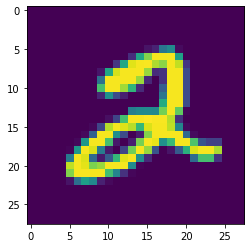

In [4]:
plt.imshow(training_images[5])

In [5]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0
training_images.shape

(60000, 28, 28)

In [12]:
model = Sequential()

input_layer = Flatten(input_shape=(28,28))
middle_layer = Dense(128, activation='relu')
output_layer = Dense(10,activation='softmax')

model.add(input_layer)
model.add(middle_layer)
model.add(output_layer)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2473 - accuracy: 0.9304
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1091 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0758 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0564 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0432 - accuracy: 0.9863


In [14]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 0s 732us/step - loss: 0.0781 - accuracy: 0.9757


[0.07812919467687607, 0.9757000207901001]

In [19]:
model.predict(training_images[5])

ValueError: in user code:

    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:420 call
        return self._run_internal_graph(
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28)
